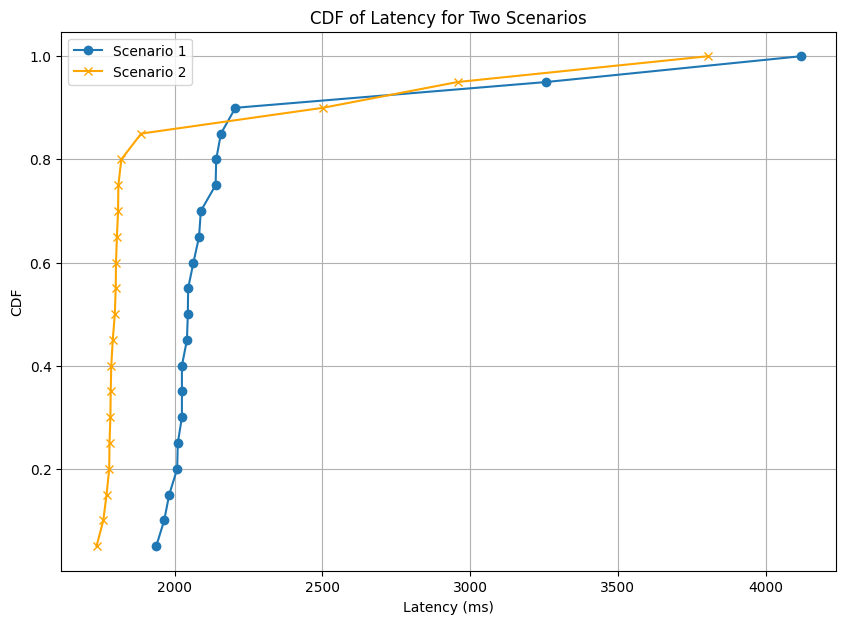

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Load the first dataset from the JSON file
with open('experiment_results.json') as f1:
    data_scenario1 = json.load(f1)

# Load the second dataset from the JSON file
with open('experiment_results111.json') as f2:
    data_scenario2 = json.load(f2)

# Extract durations (latencies) for scenario 1
durations_scenario1 = [data_scenario1['activations'][key]['duration'] for key in data_scenario1['activations']]

# Extract durations (latencies) for scenario 2
durations_scenario2 = [data_scenario2['activations'][key]['duration'] for key in data_scenario2['activations']]

# Sort durations for both scenarios
sorted_durations_scenario1 = np.sort(durations_scenario1)
sorted_durations_scenario2 = np.sort(durations_scenario2)

# CDF for both scenarios
cdf_scenario1 = np.arange(1, len(sorted_durations_scenario1) + 1) / len(sorted_durations_scenario1)
cdf_scenario2 = np.arange(1, len(sorted_durations_scenario2) + 1) / len(sorted_durations_scenario2)

# Plot both CDFs
plt.figure(figsize=(10, 7))
plt.plot(sorted_durations_scenario1, cdf_scenario1, label='Scenario 1', marker='o')
plt.plot(sorted_durations_scenario2, cdf_scenario2, label='Scenario 2', marker='x', color='orange')
plt.xlabel('Latency (ms)')
plt.ylabel('CDF')
plt.title('CDF of Latency for Two Scenarios')
plt.grid(True)
plt.legend()
plt.show()


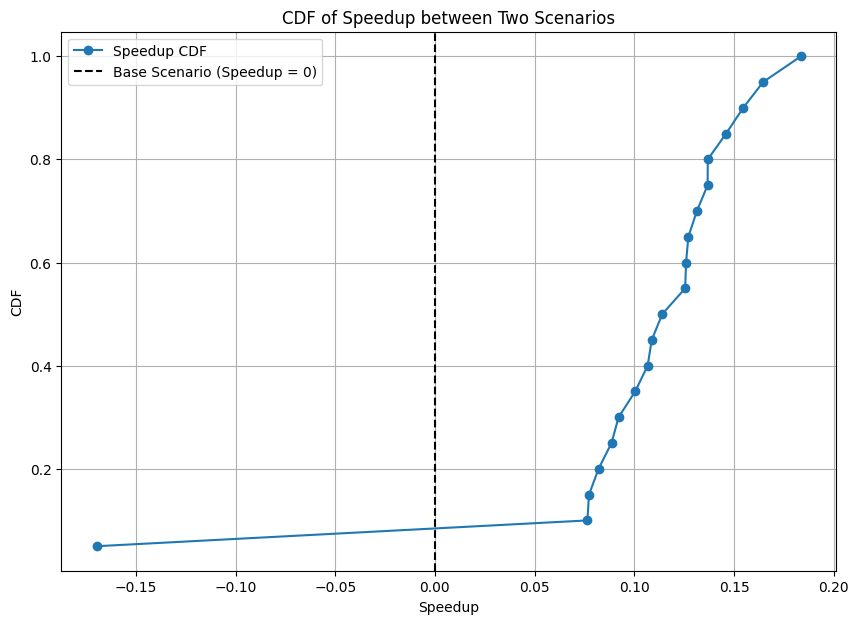

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Load the first dataset from the JSON file
with open('experiment_results.json') as f1:
    data_scenario1 = json.load(f1)

# Load the second dataset from the JSON file
with open('experiment_results111.json') as f2:
    data_scenario2 = json.load(f2)

# Extract durations (latencies) for scenario 1
durations_scenario1 = [data_scenario1['activations'][key]['duration'] for key in data_scenario1['activations']]

# Extract durations (latencies) for scenario 2
durations_scenario2 = [data_scenario2['activations'][key]['duration'] for key in data_scenario2['activations']]

# Ensure that both scenarios have the same number of requests
if len(durations_scenario1) != len(durations_scenario2):
    raise ValueError("The two scenarios must have the same number of requests to compute speedup.")

# Compute speedup: (t_scenario1 - t_scenario2) / t_scenario1
speedup = [(t1 - t2) / t1 for t1, t2 in zip(durations_scenario1, durations_scenario2)]

# Sort speedup for CDF
sorted_speedup = np.sort(speedup)

# CDF for speedup
cdf_speedup = np.arange(1, len(sorted_speedup) + 1) / len(sorted_speedup)

# Plot CDF of speedup
plt.figure(figsize=(10, 7))
plt.plot(sorted_speedup, cdf_speedup, label='Speedup CDF', marker='o')

# Add vertical dashed line for the base scenario (speedup = 0)
plt.axvline(x=0, color='black', linestyle='--', label='Base Scenario (Speedup = 0)')

# Labels and title
plt.xlabel('Speedup')
plt.ylabel('CDF')
plt.title('CDF of Speedup between Two Scenarios')

# Grid, legend, and show the plot
plt.grid(True)
plt.legend()
plt.show()


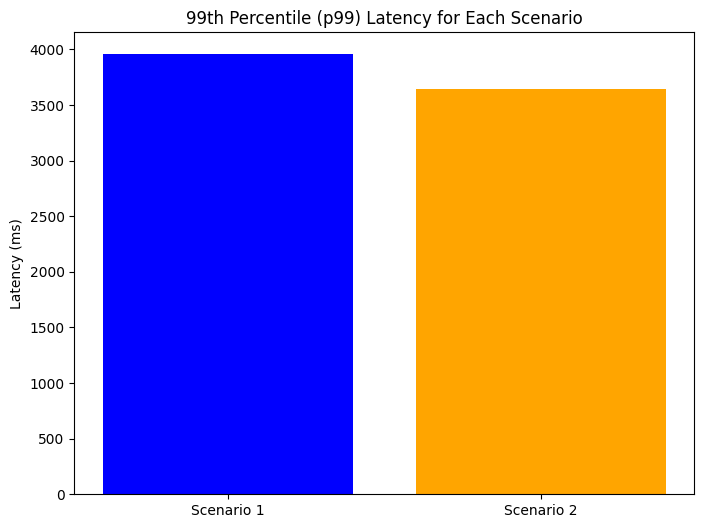

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import json

# Load the first dataset from the JSON file
with open('experiment_results.json') as f1:
    data_scenario1 = json.load(f1)

# Load the second dataset from the JSON file
with open('experiment_results111.json') as f2:
    data_scenario2 = json.load(f2)

# Extract durations (latencies) for scenario 1
durations_scenario1 = [data_scenario1['activations'][key]['duration'] for key in data_scenario1['activations']]

# Extract durations (latencies) for scenario 2
durations_scenario2 = [data_scenario2['activations'][key]['duration'] for key in data_scenario2['activations']]

# Calculate the p99 (99th percentile) for each scenario
p99_scenario1 = np.percentile(durations_scenario1, 99)
p99_scenario2 = np.percentile(durations_scenario2, 99)

# Plot the p99 latency for both scenarios
plt.figure(figsize=(8, 6))
plt.bar(['Scenario 1', 'Scenario 2'], [p99_scenario1, p99_scenario2], color=['blue', 'orange'])

# Add labels and title
plt.ylabel('Latency (ms)')
plt.title('99th Percentile (p99) Latency for Each Scenario')

# Show the plot
plt.show()
